<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist</h1></center>
<center><h2> Mesure de la dérive </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the data for each of the 4 periods of 2022
period_0 = pd.read_csv('period_0.csv')
period_1 = pd.read_csv('period_1.csv')
period_2 = pd.read_csv('period_2.csv')
period_3 = pd.read_csv('period_3.csv')

In [3]:
period_0.head() #check first 5 rows of period 0

,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2,34.00
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0,28.28
2,22,1,2,6,0.37,"Health, Household & Baby Care",11.515517,0,0,19.33
3,19,0,2,8,0.60,Toys & Games,74.495861,1,0,26.83
4,25,1,1,5,0.58,Toys & Games,1.682705,2,1,17.67


In [4]:
def data_processing(df):
    """
    Process the input DataFrame by dropping the 'TotalCart' column,
    performing one-hot encoding on the 'TopCategory' column,
    and splitting the data into training and testing sets.
    
    Args:
        df (pandas.DataFrame): The input DataFrame containing the data.
    
    Returns:
        pandas.DataFrame: The processed DataFrame (X).
        pandas.Series: The target variable (y).
        pandas.DataFrame: The training features (X_train).
        pandas.DataFrame: The testing features (X_test).
        pandas.Series: The training target variable (y_train).
        pandas.Series: The testing target variable (y_test).
    """
    # Drop the 'TotalCart' column from the DataFrame
    X = df.drop(columns='TotalCart')
    
    # Extract the 'TotalCart' column as the target variable
    y = df['TotalCart']
    
    # Perform one-hot encoding on the categorical feature 'TopCategory'
    # drop first column to remove collinearity between the one-hot encoded columns
    X = pd.get_dummies(X, columns=['TopCategory'], drop_first=True)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Return the processed data and the train/test sets
    return X, y, X_train, X_test, y_train, y_test

In [5]:
# Process the data for period_0
X_0, y_0, X_train_0, X_test_0, y_train_0, y_test_0 = data_processing(period_0)

# Process the data for period_1
X_1, y_1, X_train_1, X_test_1, y_train_1, y_test_1 = data_processing(period_1)

# Process the data for period_2
X_2, y_2, X_train_2, X_test_2, y_train_2, y_test_2 = data_processing(period_2)

# Process the data for period_3
X_3, y_3, X_train_3, X_test_3, y_train_3, y_test_3 = data_processing(period_3)

* **Entrainez votre modèle sur toute la période 0** puis **testez votre modèle** sur les données des **périodes 1, 2 et 3**. Comment évolue la performance du modèle?

## Linear Regression


In [6]:
# Train the linear regression model for period 0
lr = LinearRegression()
lr.fit(X_train_0, y_train_0)

LinearRegression()

In [7]:
# Evaluate model performance for training set (period 0) through Cross validation
cv_results = cross_validate(lr, X_train_0, y_train_0,
                        cv=10, scoring="neg_mean_squared_error",
                        return_train_score=True,
                        return_estimator=True)
train_error_0 = -cv_results["train_score"].mean()
print(f"MSE for training set (period 0): {train_error_0}")

MSE for training set (period 0): 55.686755783554304


In [8]:
# Evaluate model performance for testing set (period 0)
y_predicted_lr_0= lr.predict(X_test_0)
mse_0 = metrics.mean_squared_error(y_test_0, y_predicted_lr_0)
print(f"MSE for testing set (period 0): {mse_0}")

MSE for testing set (period 0): 83.82860934444649


In [9]:
# Evaluate model performance for testing sets of other periods
for period in range(1, 4):                                # for periods ( 1 to 3)
    X_test = globals()[f"X_test_{period}"]                # get the testing feature set of the period 
    y_test = globals()[f"y_test_{period}"]                # get their respective labels
    y_predicted = lr.predict(X_test)                      # predict the labels for the features
    mse = metrics.mean_squared_error(y_test, y_predicted) # calculate the mse
    globals()[f"y_predicted_lr_{period}"] = y_predicted   
    print(f"MSE for testing set (period {period}): {mse}")#print the mse for the current period

MSE for testing set (period 1): 64.17808772188961
MSE for testing set (period 2): 97.56534733073943
MSE for testing set (period 3): 204.47266221992996


From the cell above, we can see that the mean squared error of the linear regression model trained on period 0 data, performs poorly as we go in time, i.e: as the periods pass.

## Gradient boosting regressor

In [10]:
# Train the gradient boosting regressor for period 0
GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(X_train_0, y_train_0)

GradientBoostingRegressor(random_state=42)

In [11]:
# Evaluate model performance for training set (period 0) through cross validation
cv_results_gbr_0 = cross_validate(GBR, X_train_0, y_train_0,
                        cv=10, scoring="neg_mean_squared_error",
                        return_train_score=True,
                        return_estimator=True)
train_error_gbr = -cv_results_gbr_0["train_score"].mean()
print(f"MSE for training set (period 0): {train_error_gbr}")

MSE for training set (period 0): 0.7881390016238446


In [12]:
# Evaluate model performance for testing set (period 0)
y_predicted_gbr_0 = GBR.predict(X_test_0)
mse_gbr_0 = metrics.mean_squared_error(y_test_0, y_predicted_gbr_0)
print(f"MSE for testing set (period 0): {mse_gbr_0}")

MSE for testing set (period 0): 4.085815785206514


### Model testing on periods 1, 2, and 3

In [13]:
# Evaluate model performance for testing sets of other periods
for period in range(1, 4):                                # for periods ( 1 to 3)
    X_test = globals()[f"X_test_{period}"]                # get the testing feature set of the period 
    y_test = globals()[f"y_test_{period}"]                # get their respective labels
    y_predicted = GBR.predict(X_test)                     # predict the labels for the features
    globals()[f"y_predicted_gbr_{period}"] = y_predicted
    mse = metrics.mean_squared_error(y_test, y_predicted) # calculate the mse
    print(f"MSE for testing set (period {period}): {mse}")# print the mse for the current period

MSE for testing set (period 1): 64.55909448875398
MSE for testing set (period 2): 77.57337403455016
MSE for testing set (period 3): 191.19691787664664


Again, as previously seen with the linear regression model, the Gradient boosting regressor model underperforms more and more from a period to the other

## Random Forest Regressor

In [14]:
# Fit the model on the training data
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train_0, y_train_0)

RandomForestRegressor(random_state=42)

In [15]:
# Model evaluation for training set (period 0) through cross validation
cv_results_rfr = cross_validate(rfr, X_train_0, y_train_0,
                                cv=10, scoring="neg_mean_squared_error",
                                return_train_score=True,
                                return_estimator=True)
train_error_rfr = -cv_results_rfr["train_score"].mean()
print(f"MSE for training set (period 0): {train_error_rfr}")

MSE for training set (period 0): 1.6549779384523813


In [16]:
# Evaluate model performance for testing set (period 0)
y_predicted_rfr_0 = rfr.predict(X_test_0)
mse_rfr_0 = metrics.mean_squared_error(y_test_0, y_predicted_rfr_0)
print(f"MSE for testing set (period 0): {mse_rfr_0}")

MSE for testing set (period 0): 13.322916593800006


In [17]:
# Evaluate model performance for testing sets of other periods
for period in range(1, 4):                                # for periods ( 1 to 3)
    X_test = globals()[f"X_test_{period}"]                # get the testing feature set of the period 
    y_test = globals()[f"y_test_{period}"]                # get their respective labels
    y_predicted = rfr.predict(X_test)                     # predict the labels for the features
    globals()[f"y_predicted_rfr_{period}"] = y_predicted
    mse = metrics.mean_squared_error(y_test, y_predicted) # calculate the mse
    print(f"MSE for testing set (period {period}): {mse}")# print the mse for the current period

MSE for testing set (period 1): 66.34016396480008
MSE for testing set (period 2): 79.52549733430007
MSE for testing set (period 3): 196.40509893663344


As seen before, a similar behaviour to the previously used two models, the Random Forest Regressor model underperforms from a period to another.

# Mesure de la dérive de variables catégorielles.

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

# Measure of the drift of categorical variables.

For two discrete probability distributions $P$ and $Q$, the **Kullback-Leibler divergence** of $P$ with respect to $Q$ is defined by:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


We define the **Jensen-Shannon divergence** as a smooth and symmetric version of the Kullback-Leiber divergence given by the following formula:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

where $$M=\frac{1}{2}(P+Q)$$.

### Example of calculation of $D_\text{KL}(P \parallel Q)$ : 

Let $P$ =`[0.2, 0.3, 0.5]` and $Q$ =`[0.2, 0.4, 0.4]` be two vectors defining a discrete probability distribution. Then : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\\\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right)
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercise

* Implement functions named **`KLDivergence(P, Q)`** and **`JSDivergence(P, Q)`** to calculate the metrics defined above.

**Tips**:
* Use the Numpy library to easily perform linear algebra calculations.

In [18]:
P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

def KLDivergence(P, Q):
    """
    Calculate the Kullback-Leibler Divergence between two probability distributions.
    
    Args:
        P (numpy.array): The first probability distribution.
        Q (numpy.array): The second probability distribution.
    
    Returns:
        float: The Kullback-Leibler Divergence value.
    """
    KL = np.sum(P * np.log(P / Q))
    return KL

def JSDivergence(P, Q):
    """
    Calculate the Jensen-Shannon Divergence between two probability distributions.
    
    Args:
        P (numpy.array): The first probability distribution.
        Q (numpy.array): The second probability distribution.
    
    Returns:
        float: The Jensen-Shannon Divergence value.
    """
    M = 0.5 * (P + Q)
    JS = 0.5 * (KLDivergence(P, M) + KLDivergence(Q, M))
    return JS

* Lancer la cellule suivante pour tester votre fonction.

In [19]:
print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.006367198333995731


# Mesure de la dérive de variables quantitatives.

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [20]:
def WassersteinDistance(X, Y, p):
    """
    Calculate the Wasserstein Distance between two quantitative variables.
    
    Args:
        X (numpy.array): The first variable.
        Y (numpy.array): The second variable.
        p (float): The order of the Wasserstein distance.
    
    Returns:
        float: The Wasserstein Distance value.
    """
    X = np.sort(X)
    Y = np.sort(Y)
    W = (np.mean(np.abs(X - Y) ** p)) ** (1 / p)
    return W

* Lancer la cellule suivante pour tester votre fonction.

In [21]:
X = np.random.beta(2, 6, 100)

Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, 1)

0.12311147280092588

# Étude de la dérive du modèle.

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.

## Variables definition and helper functions creation

In [22]:
# Define the variables and their labels
quant_variables = ['Age', 'Seniority', 'Orders', 'Items','AverageDiscount',
             'BrowsingTime', 'EmailsOpened','SupportInteractions']

# Define a list of the 4 periods
periods = [period_0, period_1, period_2, period_3]

In [23]:
def normalizer(df, var):
    """
    Normalize a variable in a DataFrame by subtracting it by the same variable's
    mean and dividing by its standard deviation of period 0.
    
    Args:
        df (pandas.DataFrame): The input DataFrame.
        var (str): The variable to be normalized.
    
    Returns:
        pandas.Series: The normalized variable.
    """
    
    # return the variable, normalized by the mean and the std of the same variable in period_0
    return (df[var] - np.mean(period_0[var])) / np.std(period_0[var])

def get_percentages(var):
    """
    Calculate the percentages of a given qqualitative variable.
    
    Args:
        var (pandas.Series): The variable for which to calculate the percentages.
    
    Returns:
        numpy.array: The percentages of each value in the variable.
    """
    var_vals = var.value_counts().sort_index().values
    var_perc = var_vals / sum(var_vals)
    return var_perc

### Plotting Wasserstein Distance for the quantitative variables before normalization

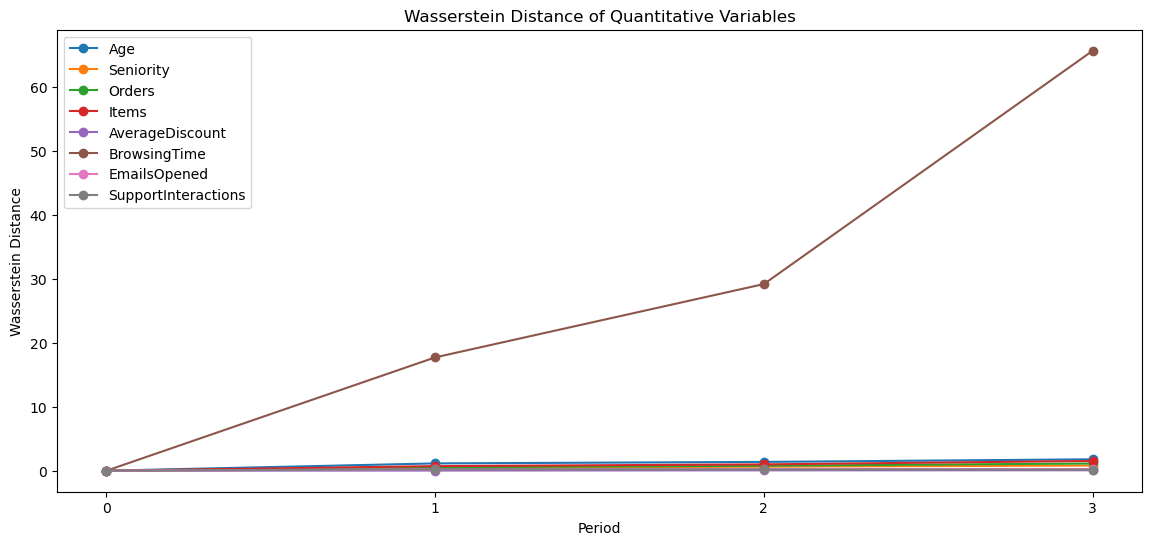

In [24]:
plt.figure(figsize=(14, 6))

for variable in quant_variables:
    # Get the distance between the current variable value of period 0 and each of the 4 periods
    distances = [
        WassersteinDistance(period_0[variable],
                            i[variable], 2)
        for i in periods
    ]

    plt.plot(range(0, 4), distances, marker='o', label=variable)

plt.xlabel('Period')                                      # modify x axis label
plt.ylabel('Wasserstein Distance')                         # modify y axis label
plt.title('Wasserstein Distance of Quantitative Variables')# set plot title
plt.xticks(range(0, 4))                                    # change xticks to 0 -> 3 whole numbers
plt.legend()                                               #show plot legend
plt.show()

From the graph above, we can see clearly that there is a significant difference in the drift value of the Browsingtime variable over the four periods, compared to the other variables. Therefore, we standardize (mean normalize) the quantitative variables, to better see the drift values with respect to period 0.

### Plotting Wasserstein Distance (drift) for the normalized quantitative variables over the 4 different periods

To **standardize** (mean normalize) the quantitative variables, for a variable ***k*** in period ***i***, we use the folliwing standardization formula:

$$ z^{(k)}_{i} = \frac{x^{(k)}_{i} - \bar{x}^{\hspace{3pt}(k)}_{{0}}}{\sigma^{(k)}_{0}} $$

Note that the subscript ***0*** refers to ***period 0***:

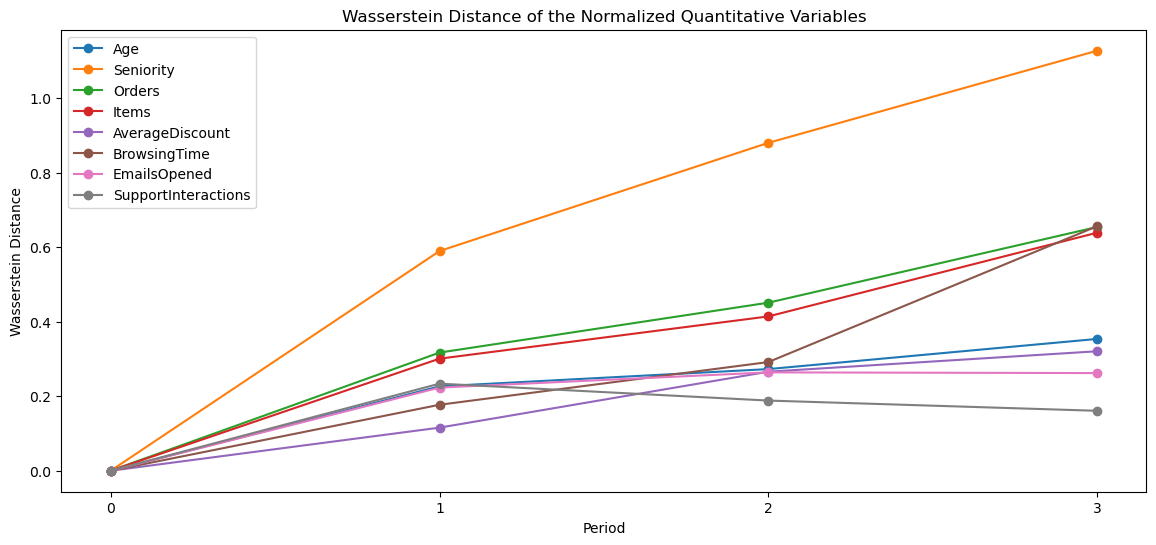

In [25]:
plt.figure(figsize=(14, 6))

for variable in quant_variables:
    # Get the distance between the current variable value of period 0 and each of the 4 periods
    distances = [
        WassersteinDistance(normalizer(period_0, variable),
                            normalizer(i, variable), 2)
        for i in periods
    ]

    plt.plot(range(0, 4), distances, marker='o', label=variable)

plt.xlabel('Period')                                                      # modify x axis label
plt.ylabel('Wasserstein Distance')                                        # modify y axis label
plt.title('Wasserstein Distance of the Normalized Quantitative Variables')# set plot title
plt.xticks(range(0, 4))                                                   # change xticks to 0 -> 3 whole numbers
plt.legend()                                                              #show plot legend
plt.show()

From the figure above, we can see now that after normalization, and with respect to period 0, the highest drift over all the variables was seen in the **<i>Seniority</i>** variable, meaning that the distrbution of the seniority variable had the highest change in the distribution from a period to another, while the rest of the variables driftted with similar proportions, except for the **<i>SupportInteractions</i>** variable that had an average drift in period 1, then its drift decreased a little by a little from period 1 to 2 and 2 to 3.

### Plotting Wasserstein Distance for the quantitative variables before normalization

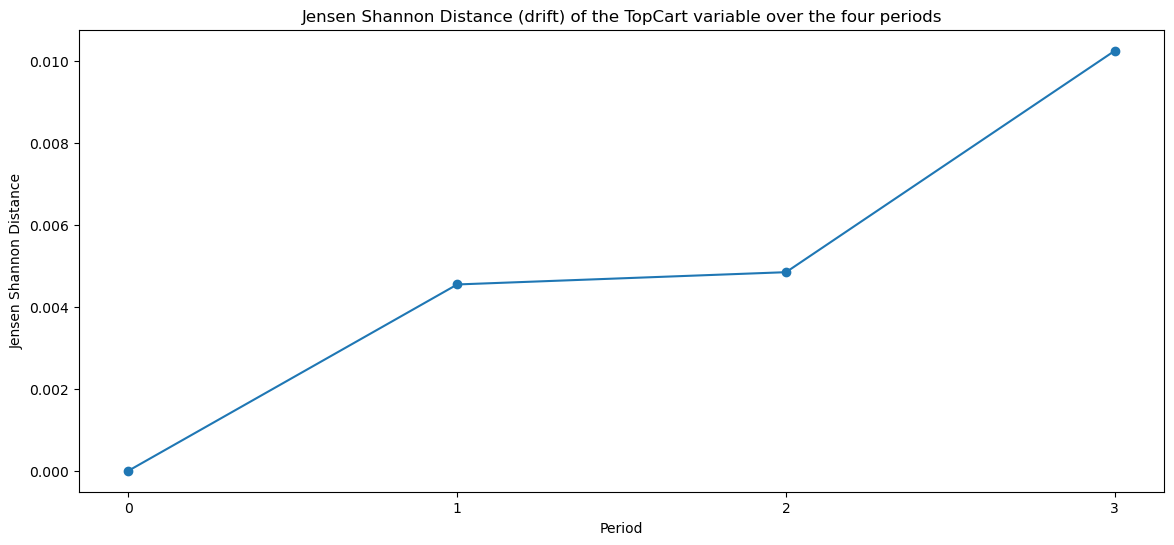

In [26]:
plt.figure(figsize=(14, 6))
topCat_drifts = [JSDivergence(get_percentages(period_0.TopCategory), get_percentages(i.TopCategory))
                 for i in periods]

plt.plot(range(0, 4), topCat_drifts, marker='o')

plt.xlabel('Period')                                                                       # modify x axis label
plt.ylabel('Jensen Shannon Distance')                                                      # modify y axis label
plt.title('Jensen Shannon Distance (drift) of the TopCart variable over the four periods') # set plot title
plt.xticks(range(0, 4))                                                                    # change xticks to 0 -> 3 whole numbers
plt.show()

From the figure, we can see that there is a little drift from a period to another in the ***TopCart*** variable, where this change can be neglected, since the Jensen Shannon distance ranges between 0 and 1. Therefore having a maximum drift value of period 3 of 0.01 can be neglected. However, it should be monitored from time to time, due to the monotonic behaviour of the drift curve.

## Models prediction drift over the four different periods

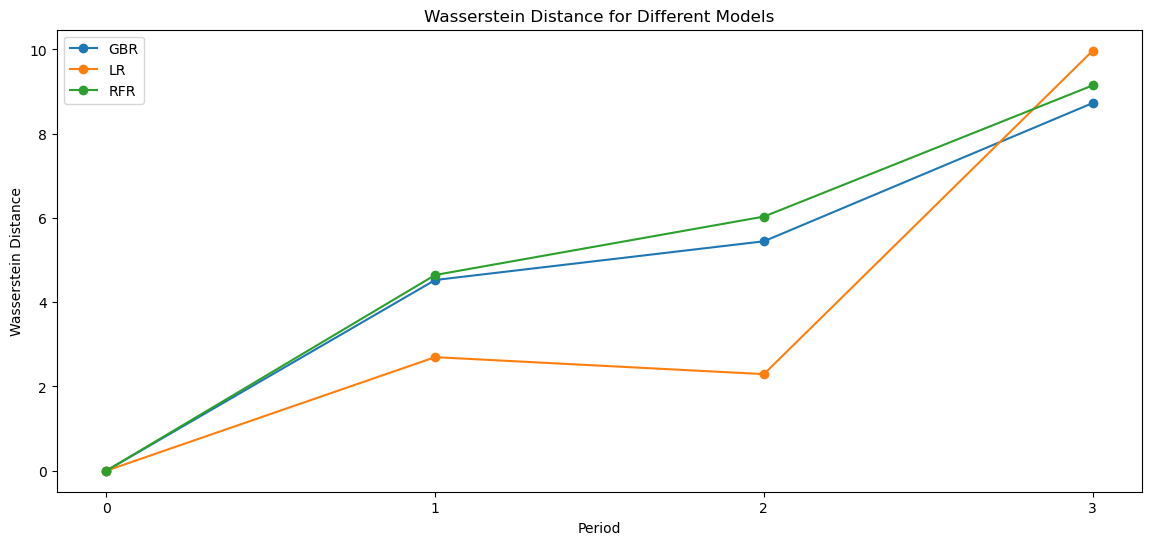

In [27]:
models_gbr = [y_predicted_gbr_0, y_predicted_gbr_1, y_predicted_gbr_2, y_predicted_gbr_3]
models_lr = [y_predicted_lr_0, y_predicted_lr_1, y_predicted_lr_2, y_predicted_lr_3]
models_rfr = [y_predicted_rfr_0, y_predicted_rfr_1, y_predicted_rfr_2, y_predicted_rfr_3]


plt.figure(figsize=(14, 6))
plt.plot(range(0, 4),
         [WassersteinDistance(models_gbr[0], i, 2) for i in models_gbr],
         marker='o', label='GBR')
         
plt.plot(range(0, 4),
         [WassersteinDistance(models_lr[0], i, 2) for i in models_lr],
         marker='o', label='LR')

plt.plot(range(0, 4),
         [WassersteinDistance(models_rfr[0], i, 2) for i in models_rfr],
         marker='o', label='RFR')

plt.xlabel('Period')                                       # modify x axis label
plt.ylabel('Wasserstein Distance')                         # modify y axis label
plt.title('Wasserstein Distance for Different Models')     # set plot title
plt.xticks(range(0, 4))                                    # change xticks to 0 -> 3 whole numbers
plt.legend()                                               #show plot legend
plt.show()

From the figure above, we can see that the ***Linear regression*** model had an alternating behaviour between increasing and decreasing drift over the four periods, where its drift with respect to period 0, and then increases significantly. For the other two models (***Gradient boosting regressor*** and ***Random forest regressor***), we can see an almost typical drifting behaviour, where they both drift increasingly from a period to the other.